## Final Project Submission

Please fill out:
* Student name: Minna Fingerhood
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fangfang
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [ ]:
#how does date affect the price of houses? 
#date and season
#heatmap of lat/long at house prices?
#how does bathroom and square footage -- high correlation demonstrated by heatmap 

In [66]:
import warnings
warnings.filterwarnings("ignore")

assingment: 
    - You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

questions to keep in mind:

    -"how did you pick the question(s) that you did?"
    -"why are these questions important from a business perspective?"
    -"how did you decide on the data cleaning options you performed?"
    -"why did you choose a given method or library?"
    -"why did you select those visualizations and what did you learn from each of them?"
    -"why did you pick those features as predictors?"
    -"how would you interpret the results?"
    -"how confident are you in the predictive quality of the results?"
    -"what are some of the things that could cause the results to be wrong?"

In [67]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import sklearn as sk
%matplotlib inline
sns.set()


In [68]:
import functions as f

In [69]:
df = pd.read_csv('kc_house_data.csv')

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [71]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [73]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [74]:
#merge cristina datetime
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
5         5/12/2014
6         6/27/2014
7         1/15/2015
8         4/15/2015
9         3/12/2015
10         4/3/2015
11        5/27/2014
12        5/28/2014
13        10/7/2014
14        3/12/2015
15        1/24/2015
16        7/31/2014
17        5/29/2014
18        12/5/2014
19        4/24/2015
20        5/14/2014
21        8/26/2014
22         7/3/2014
23        5/16/2014
24       11/20/2014
25        11/3/2014
26        6/26/2014
27        12/1/2014
28        6/24/2014
29         3/2/2015
            ...    
21567     6/10/2014
21568     12/2/2014
21569     8/28/2014
21570    10/15/2014
21571      3/5/2015
21572    11/13/2014
21573     9/10/2014
21574     5/14/2014
21575     10/2/2014
21576     4/16/2015
21577     3/17/2015
21578    10/17/2014
21579    10/31/2014
21580     8/13/2014
21581     4/21/2015
21582    10/13/2014
21583     9/15/2014
21584    10/15/2014
21585      4/7/2015


In [75]:
#check & inspect duplicates id
# df[df.id.duplicated(keep=False)]
#duplicates are a result of the same house being sold another time... Therefore do not need to delete 

In [76]:
#deal with nulls in year renovated
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [77]:
df = f.clean_data(df)

In [78]:
#look at box plots to check cat data after cleaning

In [79]:
#look at distributions of data to see if transformations needed

normalize features with log transforms

In [80]:
c = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
df = f.log_transform(df, c)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a62c588>,
      dtype=object)

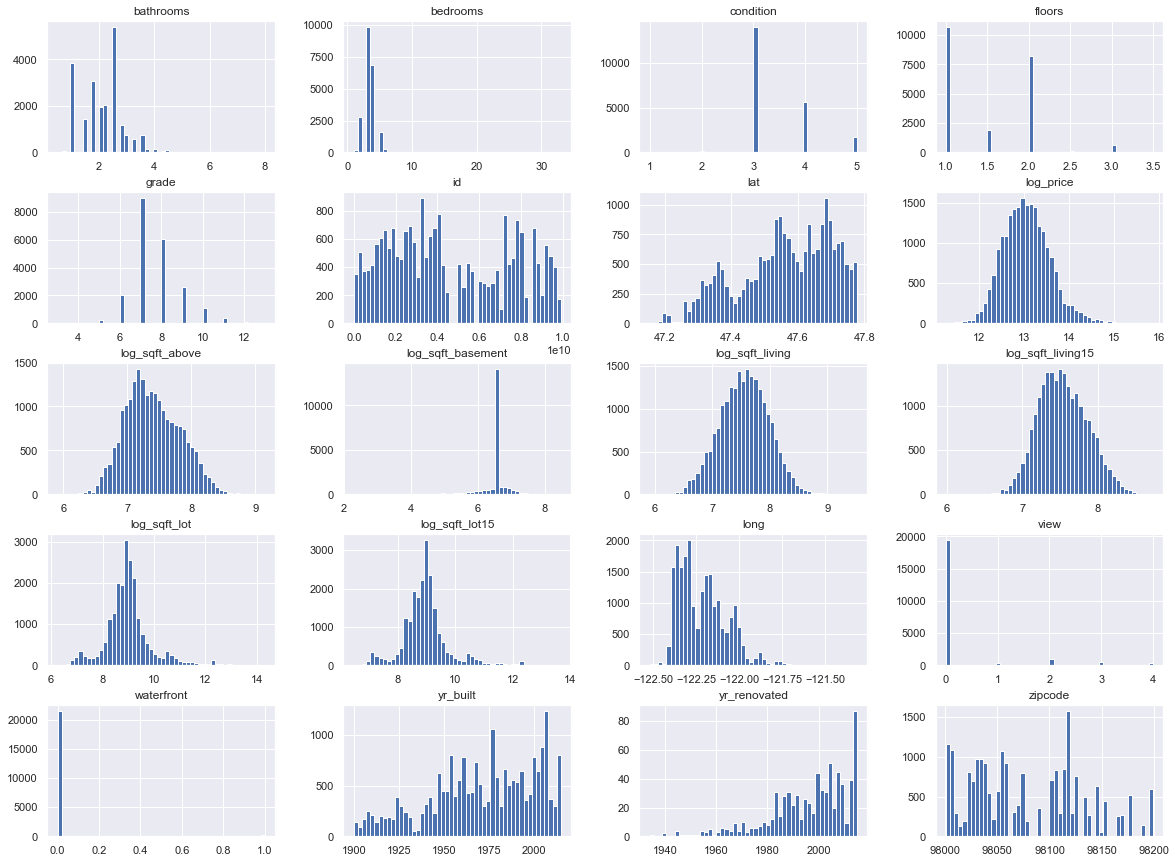

In [81]:
df.hist(bins=50, figsize=(20,15))


0

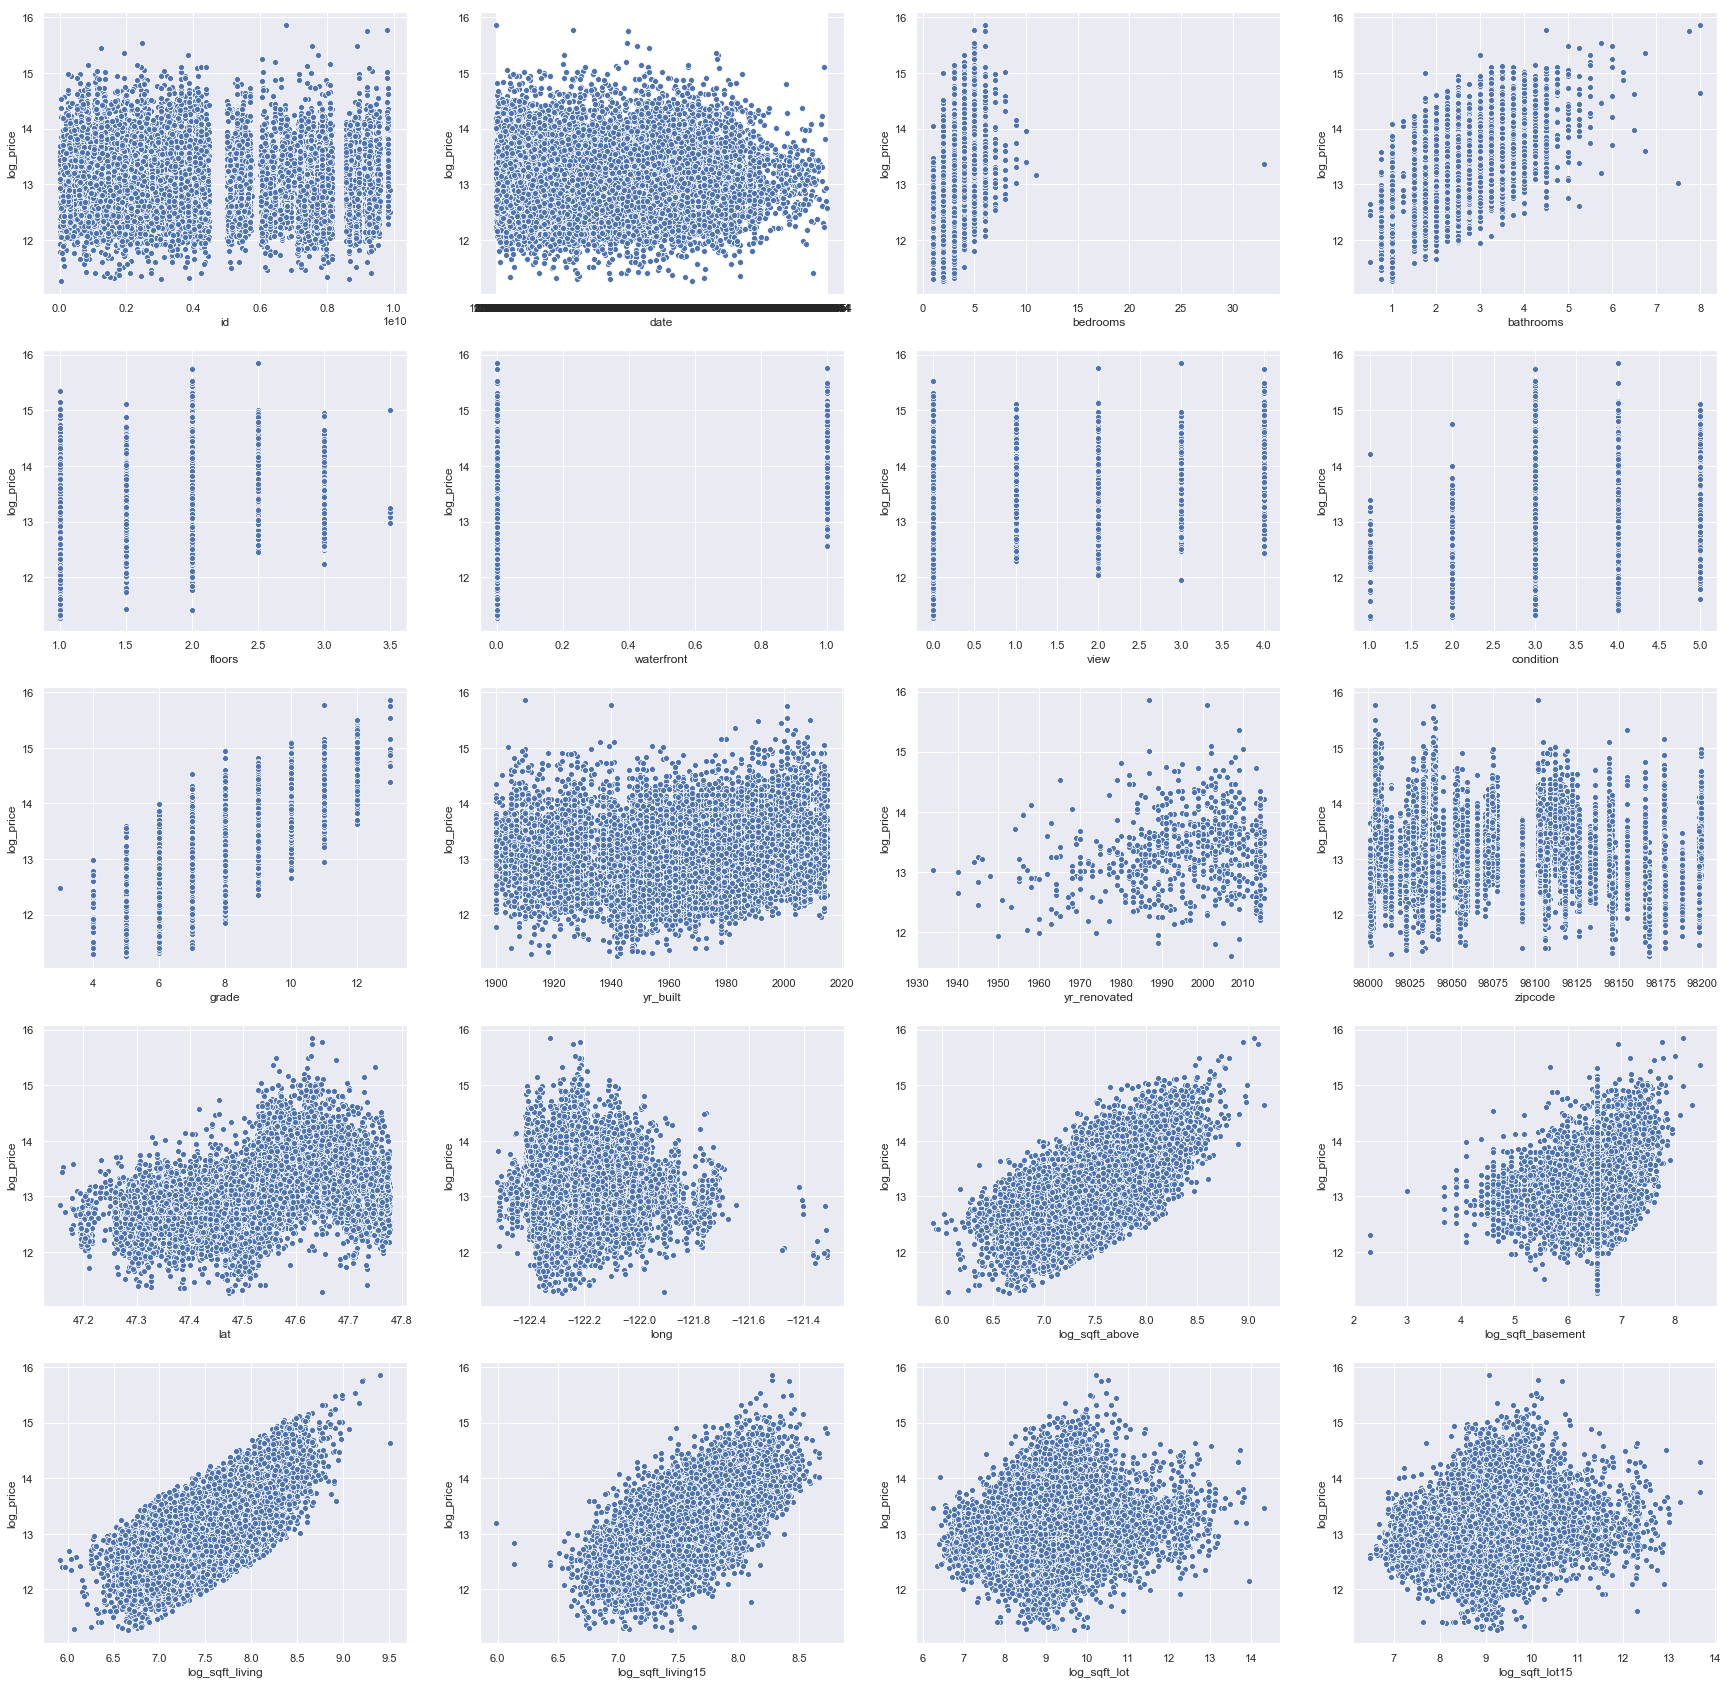

In [82]:
#identify outliers by looking at each indep var vs dep
f.scatter_one_vs_all(df,'log_price')

In [83]:
# chhose bedroom and bathrooms to elim outliers
outliers = ['bedrooms', 'bathrooms','long']
df = f.remove_outliers(df, outliers)

In [84]:
# df.info()

0

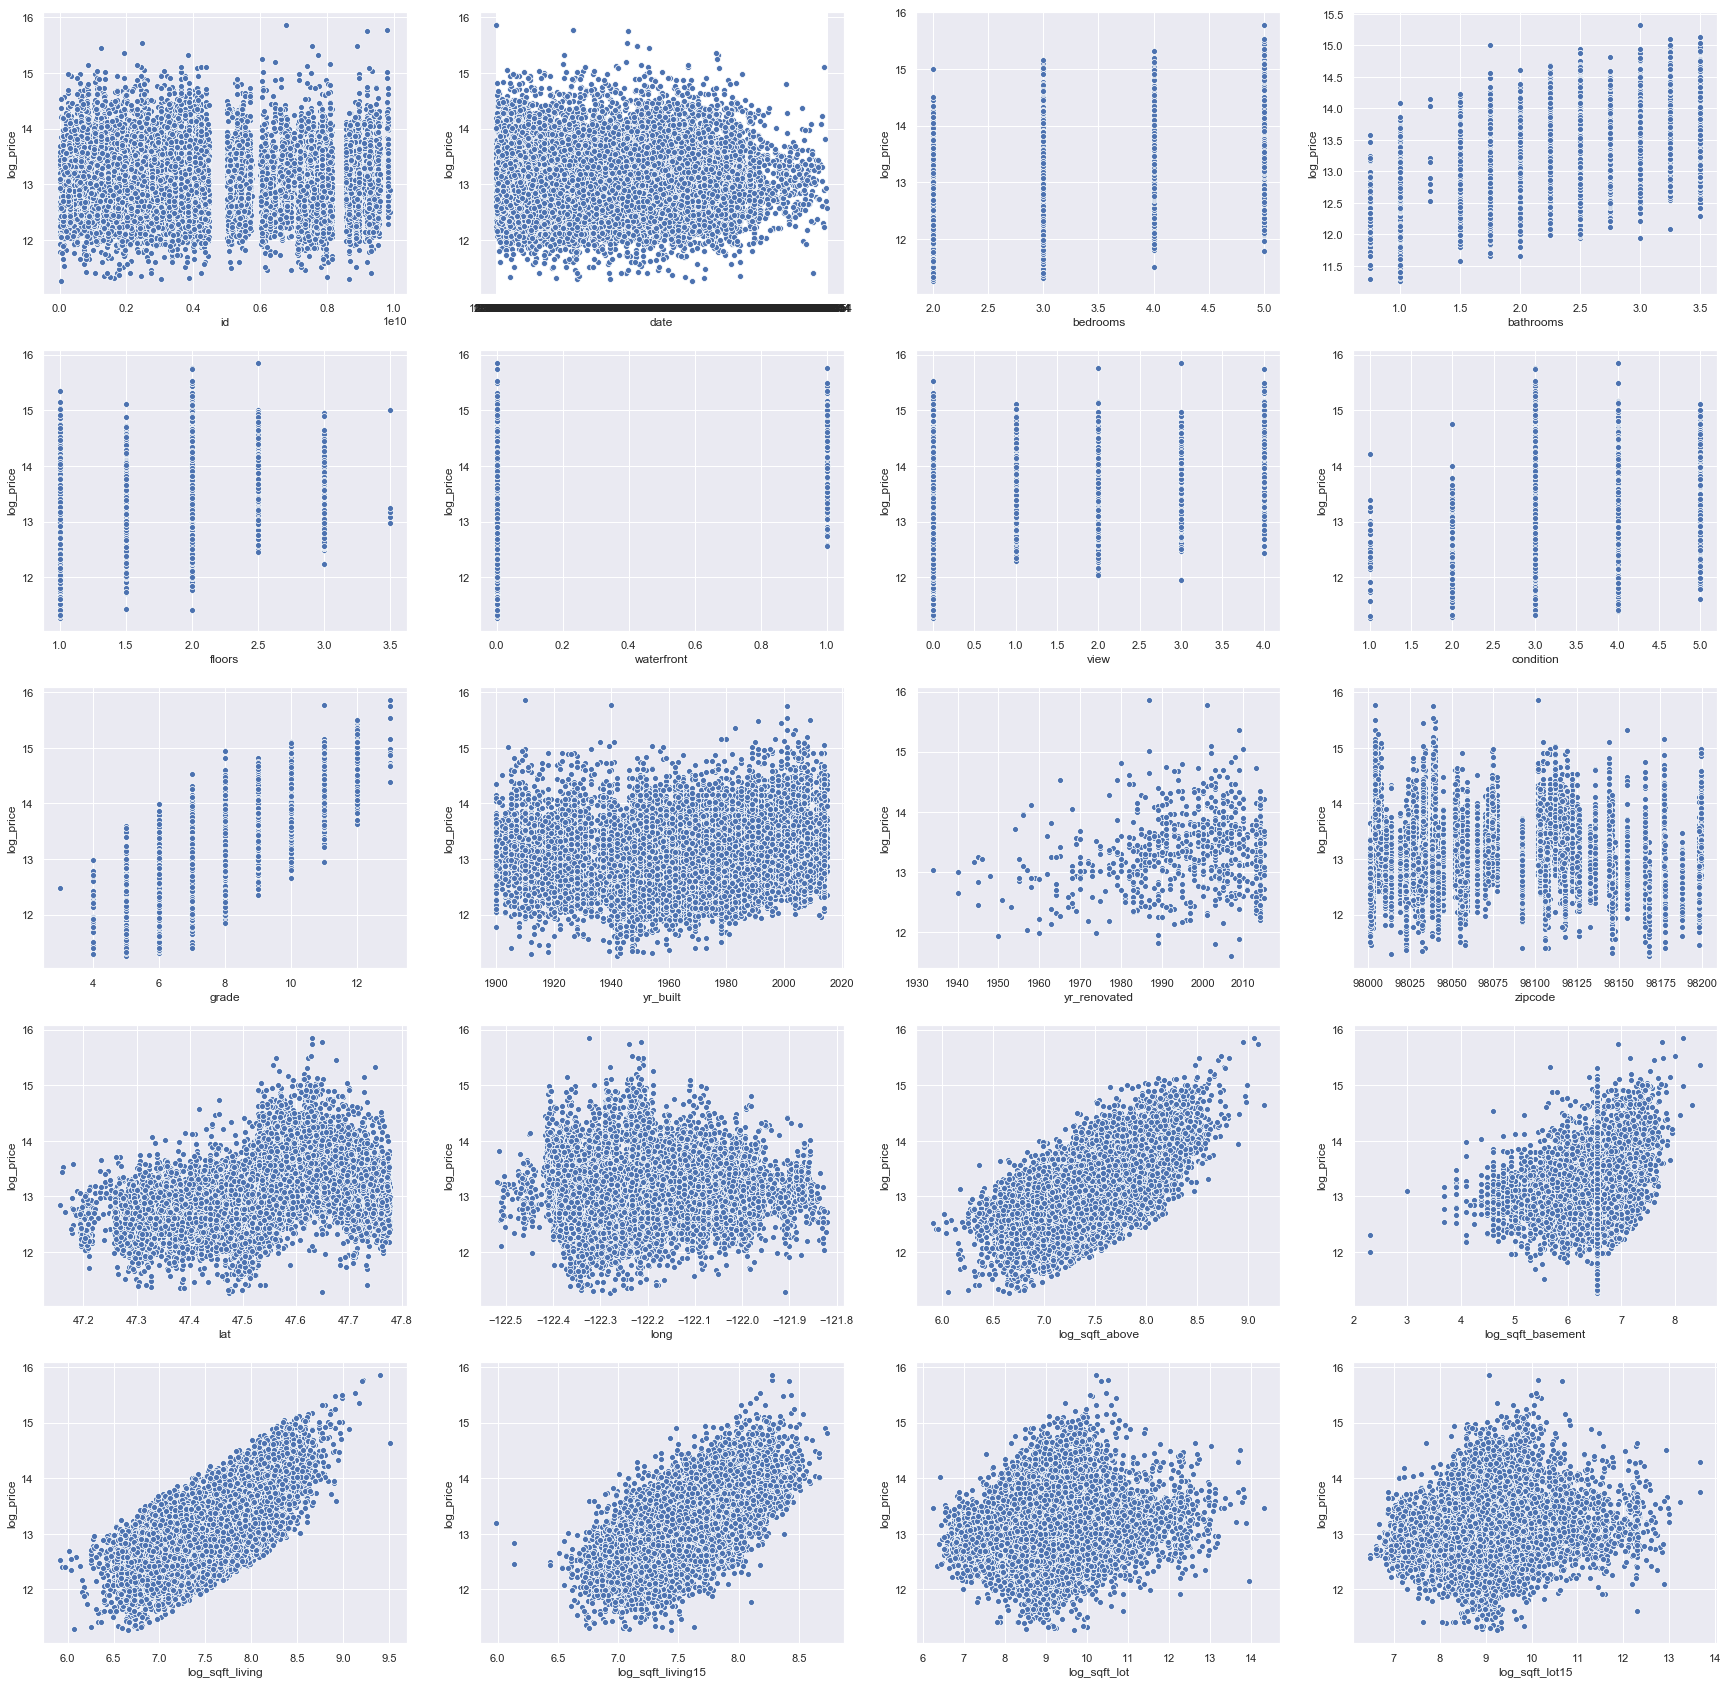

In [85]:
f.scatter_one_vs_all(df,'log_price')

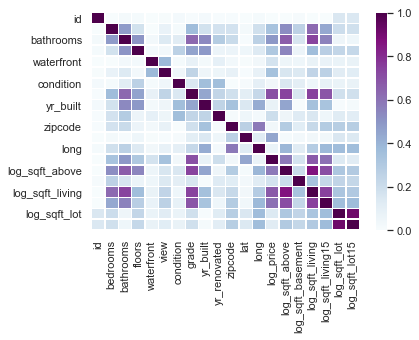

In [86]:
#check for colinearity
sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidths=.5)

In [112]:
df = df[['long', 'lat' ,'price']]

KeyError: "['price'] not in index"

In [87]:
df.corr()[abs(df.corr()>.75)]

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,log_price,log_sqft_above,log_sqft_basement,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0

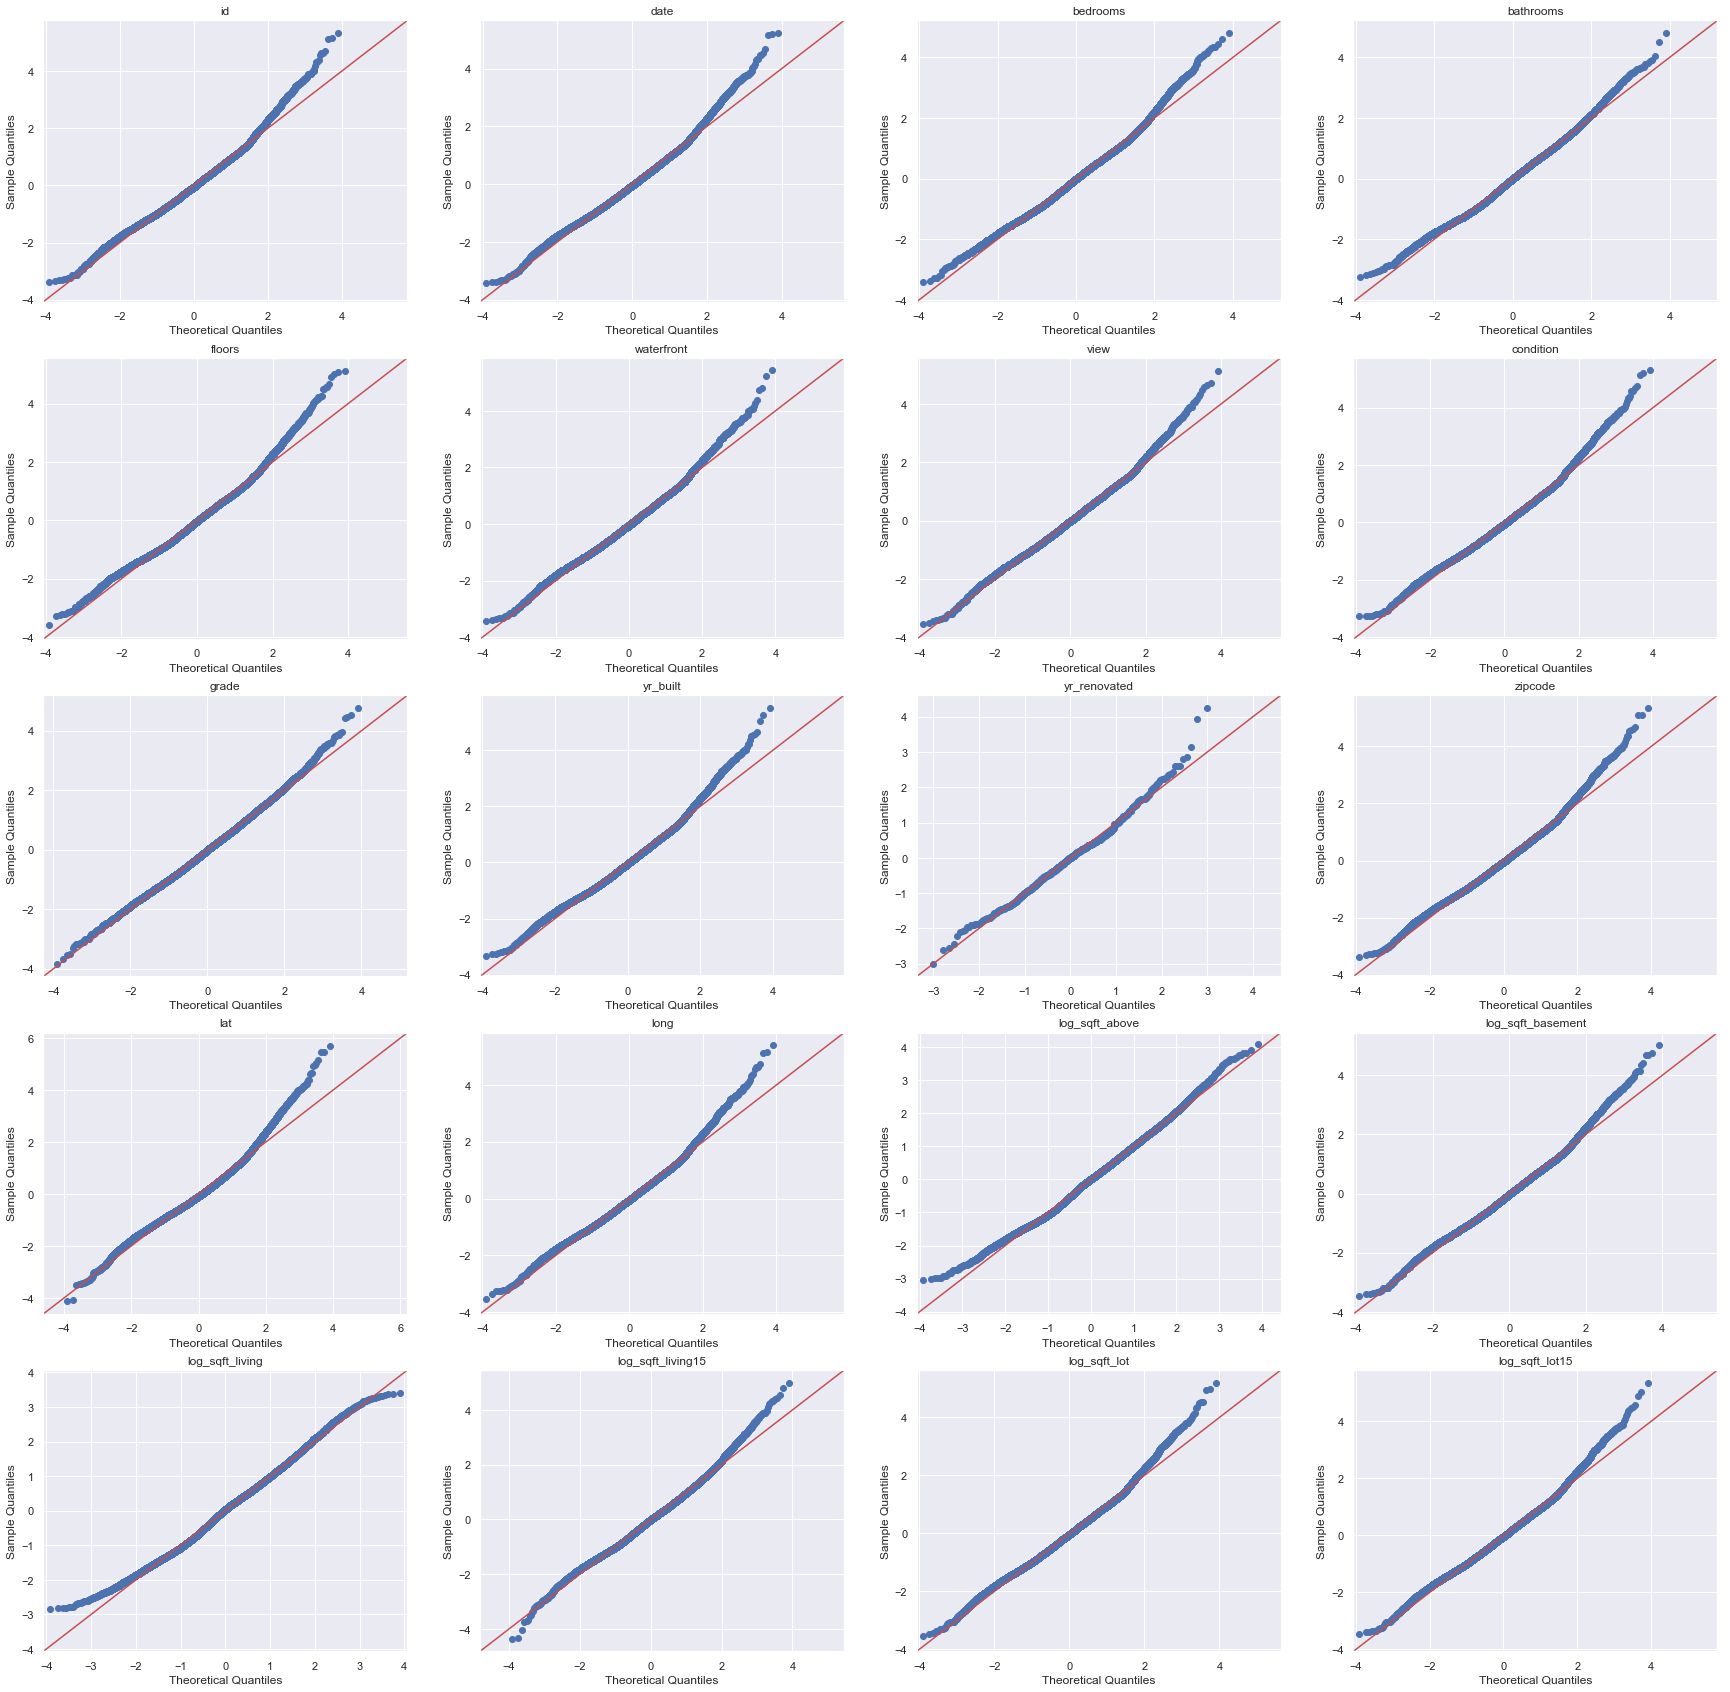

In [88]:
f.jarque_bera('log_price', df)

In [89]:
df['view'] = df['view'].replace(0.0, np.nan)

TypeError: plot_partregress() missing 1 required positional argument: 'exog_others'

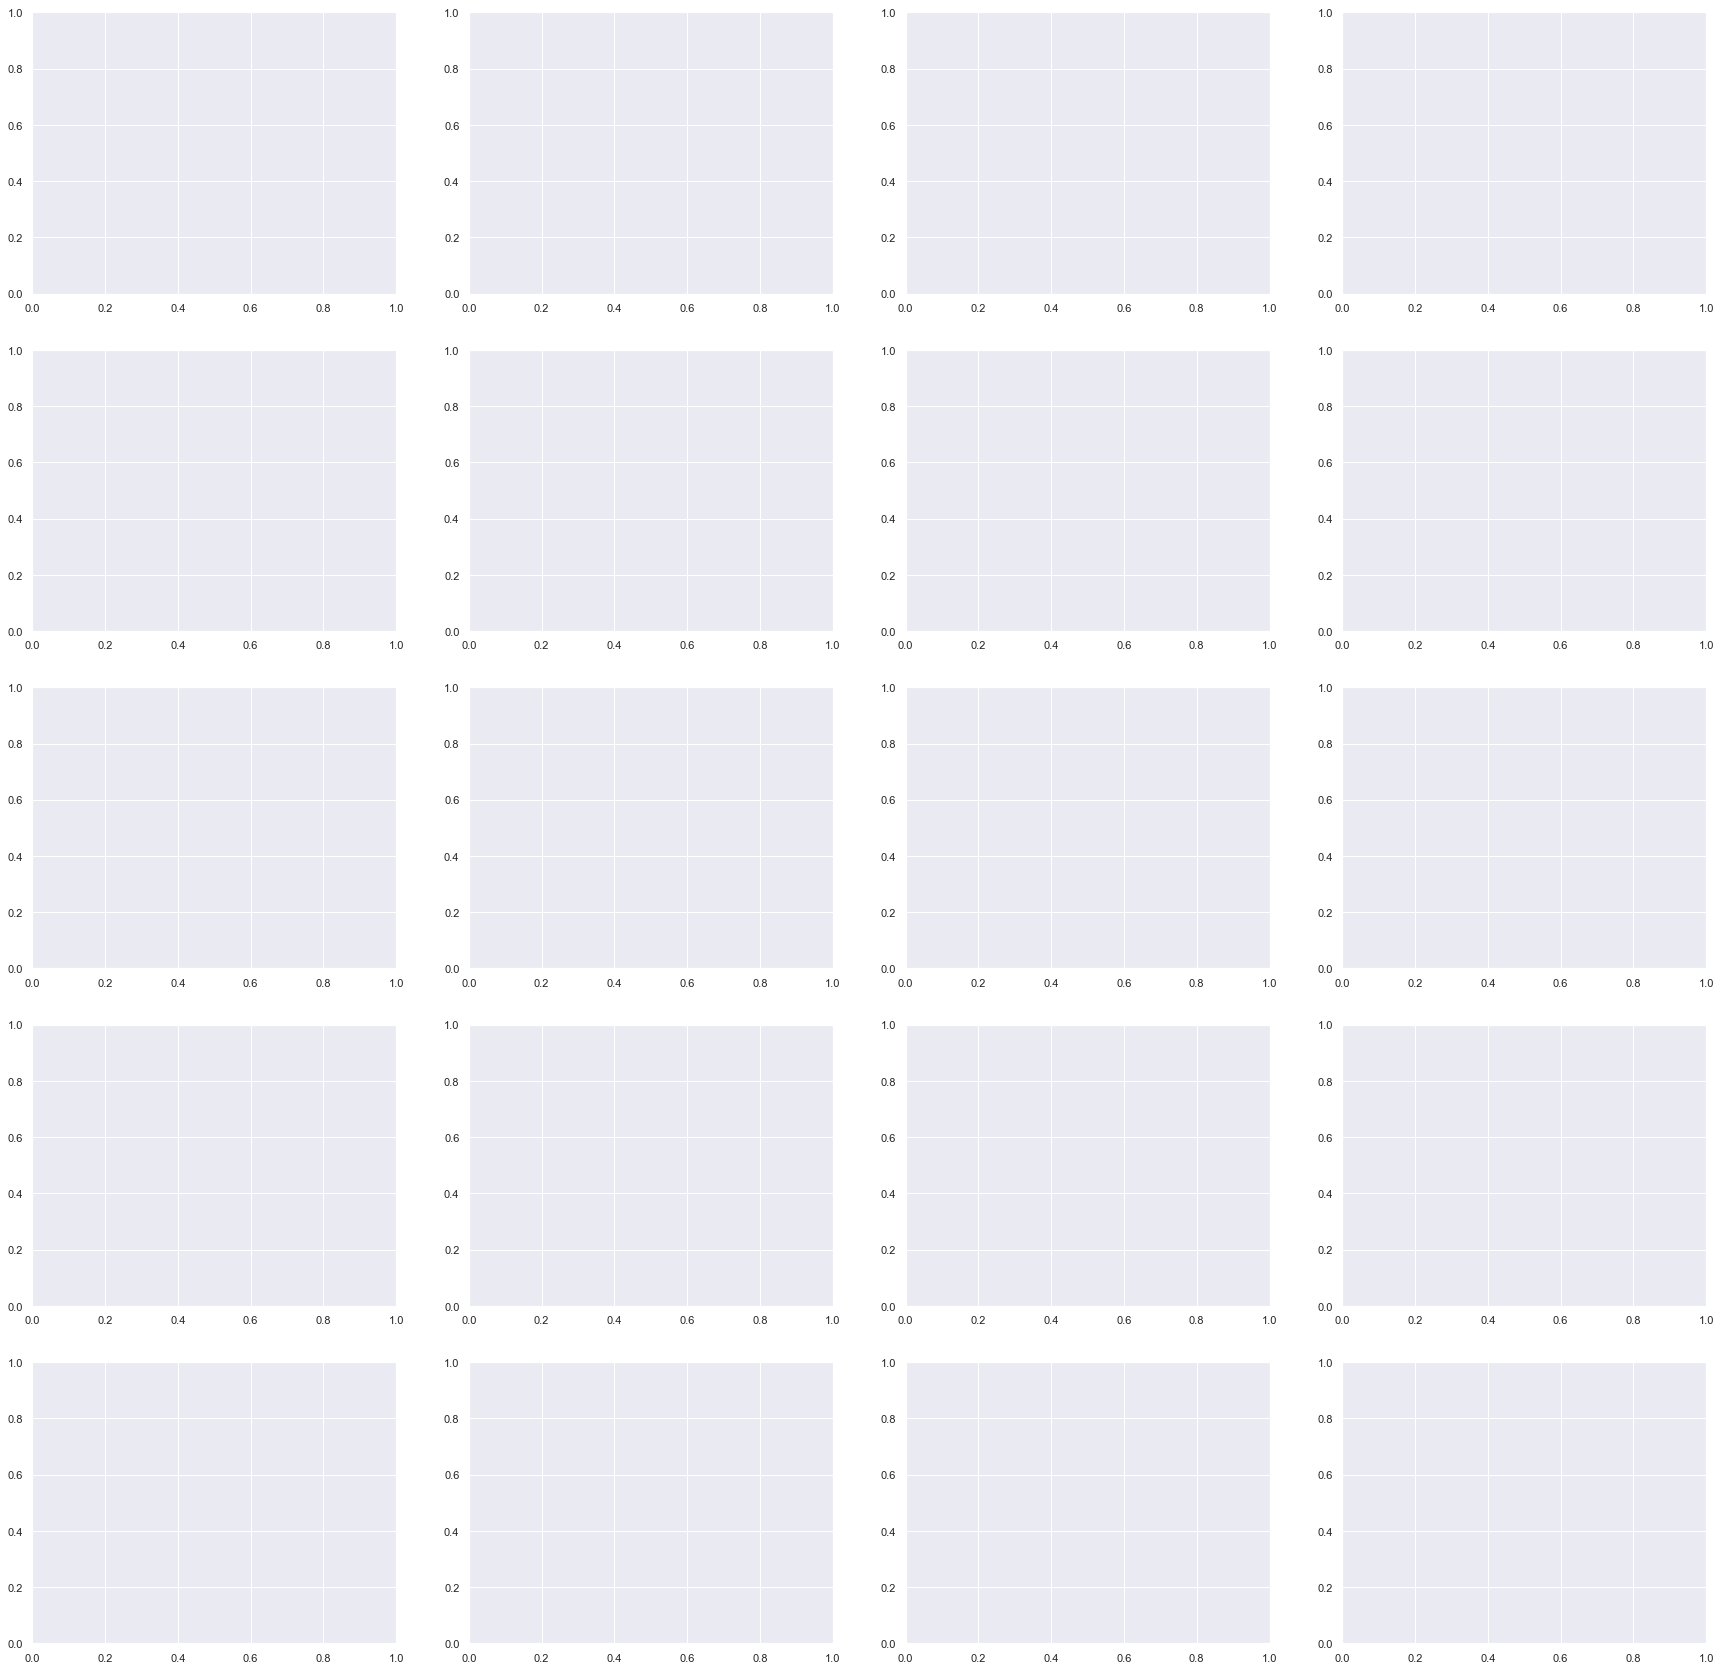

In [90]:
f.partial_regress('log_price', df)

In [122]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'log_price', 'log_sqft_above', 'log_sqft_basement',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15'],
      dtype='object')

In [111]:
#heatmap of lat/long at house prices?
df= df.loc[: ,13:14]
# df.info()
# corr = df.corr()  
# sns.heatmap(corr)
# sns.heatmap(abs(df['lat','long'].corr()), cmap = 'BuPu', linewidths=.5)
# c = corr(df.lat , df.long)
# sns.heatmap((df['lat', 'long'], cmap = 'BuPu', linewidths=.5)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [13] of <class 'int'>

In [148]:
col = df.reindex(columns=['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'])


In [42]:
list_colum = ['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'log_price', 'log_sqft_above', 'log_sqft_basement',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15']

In [43]:
print(test_predictors(list_colum))

ValueError: could not convert string to float: '10/13/2014'

In [62]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [64]:
df.view.values.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [60]:

import statsmodels.formula.api as smf

model = smf.ols('log_price ~ bedrooms + bathrooms +sqft_living +
       sqft_lot +floors + waterfront + view + condition + grade +
        sqft_above + sqft_basement + yr_built + yr_renovated').fit()
print(model.summary())

PatsyError: Error evaluating factor: NameError: name 'log_price' is not defined
    log_price ~ sqft_basement
    ^^^^^^^^^

In [96]:
import statsmodels.formula.api as smf

price_vs_bathrooms = smf.ols(formula = 'log_price~bathrooms+log_sqft_living+grade+log_sqft_above',data=df).fit()
price_vs_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5607.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:41:00   Log-Likelihood:                -7655.9
No. Observations:               21036   AIC:                         1.532e+04
Df Residuals:                   21031   BIC:                         1.536e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.5583      0.063    135.156      0.000       8.434       8.682
bathrooms          -0.0387      0.005     -7.262      0.000      -0.049      -0.028
log_sqft_living     0.6047      0.013     47.210      0.000       0.580       0.630
grade               0.2210      0.003     66.284      0.000       0.214       0.227
log_sqft_above     -0.2289      0.012    -19.507      0.000      -0.252      -0.206
==============================================================================
Omnibus:                       60.432   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.882
Skew:                           0.131   Prob(JB):                     6.02e-14
Kurtosis:                       3.018   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
price_vs_bathrooms = smf.ols(formula = 'log_price~waterfront+grade+condition+view ',data=df).fit()
price_vs_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     8043.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:38:48   Log-Likelihood:                -8691.0
No. Observations:               21597   AIC:                         1.739e+04
Df Residuals:                   21593   BIC:                         1.742e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1915      0.022    453.419      0.000      10.147      10.236
waterfront     0.7010      0.030     23.236      0.000       0.642       0.760
grade          0.3212      0.002    150.785      0.000       0.317       0.325
condition      0.1151      0.004     30.067      0.000       0.108       0.123
==============================================================================
Omnibus:                       36.047   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.772
Skew:                           0.088   Prob(JB):                     1.04e-08
Kurtosis:                       3.098   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
import statsmodels.formula.api as smf

price_vs_bathrooms = smf.ols(formula = 'log_price~bathrooms+log_sqft_living+grade',data=df).fit()
price_vs_bathrooms.summary()

In [171]:
price_vs_bathrooms = smf.ols(formula = 'log_price~waterfront+grade ',data=df).fit()
price_vs_bathrooms.summary()


In [172]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression



predictors = df.reindex(columns=new_col[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'log_sqft_above', 'log_sqft_basement',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15']])


linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(predictors, df['log_price'])



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
selector.support_

In [56]:
def test_predictors(list_of_features):
    predictors = df.reindex(columns=list_of_features)

    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = 2)
    selector = selector.fit(predictors, df['log_price'])

    selector_list = selector.support_
    answer_list = []
    
    for i in range(0,len(selector_list)):
         answer_list.append(f'{list_of_features[i]} - {selector_list[i]}')
    
    return answer_list

In [57]:
print(test_predictors([['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'log_sqft_above', 'log_sqft_basement',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15']]))

KeyError: 'log_price'